In [254]:
import pandas as pd
import numpy as np
import matplotlib


vc= pd.ExcelFile("vc.xlsx")
print(vc.sheet_names)
fund_data = vc.parse('Funding Data')
state_map=vc.parse('State Map')


#Removing duplicated row
fund_data[fund_data.duplicated(subset=None, keep='first')]
fund_data1=fund_data.drop_duplicates()
fund_data1['company']=fund_data1['company'].str.replace(" ","")

#CURRENCY CONVERSION not required because of one data point,conversion to handle future 
fund_data1.loc[fund_data1.raisedCurrency=='USD', 'currency_conv'] = 1
fund_data1.loc[fund_data1.raisedCurrency=='CAD', 'currency_conv'] = 0.73508
fund_data1.loc[fund_data1.raisedCurrency=='EUR', 'currency_conv'] = 1.13657
#Flag creation
fund_data1.loc[fund_data1.raisedCurrency=='USD', 'flag'] = 1
fund_data1.loc[fund_data1.raisedCurrency=='CAD', 'flag'] = 2
fund_data1.loc[fund_data1.raisedCurrency=='EUR', 'flag'] = 3
#Employee count and permalink left undisturbed since we are not using modelling otherwise we go for interpolation or imputation

['Funding Data', 'State Map']


D:\newconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\newconda\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\newconda\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [255]:
fund_data1['Total_amount']=fund_data1['currency_conv']*fund_data1['raisedAmt']
fund_data1.tail()


D:\newconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,company,Employee count,category,city,fundedDate,raisedAmt,raisedCurrency,round,currency_conv,flag,Total_amount
1455,trusera-2,Trusera,15.0,web,Seattle,2007-06-01,2000000.0,USD,angel,1.0,1.0,2000000.0
1456,alerts-com-6,Alerts.com,NaN,web,Bellevue,2008-07-08,1200000.0,USD,a,1.0,1.0,1200000.0
1457,myrio-2,Myrio,75.0,software,Bothell,2001-01-01,20500000.0,USD,unattributed,1.0,1.0,20500000.0
1458,grid-networks-7,GridNetworks,NaN,web,Seattle,2007-10-30,9500000.0,USD,a,1.0,1.0,9500000.0
1459,grid-networks-3,GridNetworks,NaN,web,Seattle,2008-05-20,10500000.0,USD,b,1.0,1.0,10500000.0


In [256]:
fund_data1['Year']=fund_data1['fundedDate'].apply(lambda x: x.strftime('%Y'))
fund_data1['Month']=fund_data1['fundedDate'].apply(lambda x: x.strftime('%m'))
fund_data1['Week']=fund_data1['fundedDate'].apply(lambda x: x.strftime('%d'))
fund_data1['Day']=fund_data1['fundedDate'].apply(lambda x: x.strftime('%U'))


D:\newconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\newconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\newconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [257]:

state_map=state_map.drop_duplicates()
state_map.head()
state_map=state_map.reset_index()
#len(state_map)


In [258]:
#Foolowing cities are uncertain from the data West Palm Beach,Fairfield,Portland,Plano while separting state from string

state_map['city']=state_map.city.apply(lambda x: str(x)[:-4])
state_map=state_map.loc[~state_map.city.isin(['West Palm Beach','Fairfield','Portland','Plano'])]
company_city=fund_data1.loc[:,['company','city']].dropna().drop_duplicates()
company_city=company_city.reset_index()
print(len(state_map))
state_map.head()

194


,index,city,state
0,0,Gilbert,AZ
1,1,Phoenix,AZ
2,2,Scottsdale,AZ
3,5,Tempe,AZ
4,7,,AZ


In [259]:
len(fund_data1)

1459

In [260]:
fund_data1.head()
fund_data1=fund_data1.drop(['city'], axis=1)

In [261]:

fund_data1=pd.merge(fund_data1,company_city,on='company',how='left')

In [262]:

fund_data1=pd.merge(fund_data1,state_map,on='city',how='left')

In [263]:
fund_data1=fund_data1.drop(['index_x','index_y'], axis=1)


In [264]:
#replacing unknow city,state,category with others

fund_data1['city'] = fund_data1['city'].fillna('others')
fund_data1['state'] = fund_data1['state'].fillna('others')
fund_data1['category'] = fund_data1['category'].fillna('others_null')

In [268]:
len(fund_data1)

1459

In [266]:
### Visualization and Interpreatation
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud
color = sns.color_palette()
!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.options.mode.chained_assignment = None
%matplotlib inline
fund_data1["Year"] = pd.to_numeric(fund_data1["Year"])
fund_data1["Month"] = pd.to_numeric(fund_data1["Month"])
fund_data1['Year-Month']=fund_data1['Year']*100+fund_data1['Month']
fund_data1.head()
funding_data=fund_data1
fund_data1.to_csv("vc_final.csv",index=False)

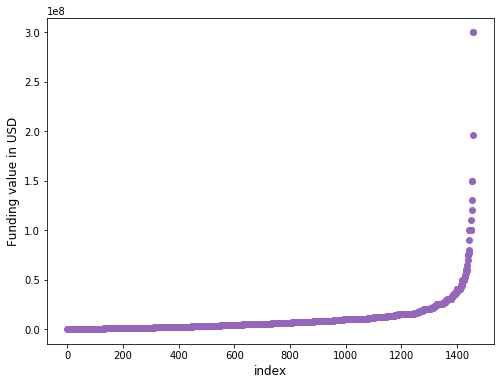

In [295]:
###Distribution of Funding Value:
AmountInUSD = funding_data["raisedAmt"]
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color=color[4])
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value million in USD', fontsize=12)
plt.show()

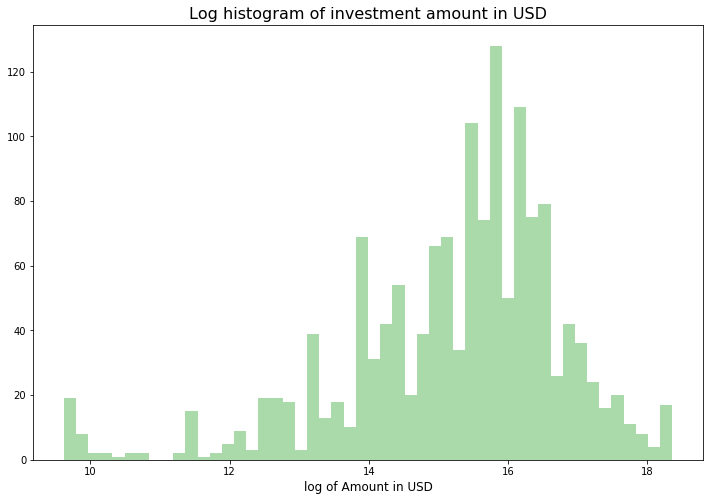

In [296]:
ulimit = np.percentile(AmountInUSD.values, 99)
llimit = np.percentile(AmountInUSD.values, 1)
AmountInUSD[AmountInUSD>ulimit] = ulimit
AmountInUSD[AmountInUSD<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(np.log(AmountInUSD.values), bins=50, kde=False, color=color[2])
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log histogram of investment amount in USD", fontsize=16)
plt.show()


D:\newconda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



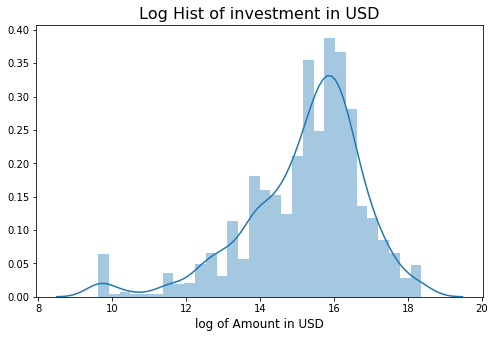

In [297]:
funding_data['log_sum'] = np.log(funding_data["raisedAmt"] + 1)

plt.figure(figsize=(8,5))
sns.distplot(funding_data['log_sum'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

In [267]:
### % missing data in 2 columns
total = fund_data1.isnull().sum().sort_values(ascending = False)
percent = ((fund_data1.isnull().sum()/fund_data1.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head(2)

,Total,Percent %
Employee count,893,61.206306
permalink,4,0.274160


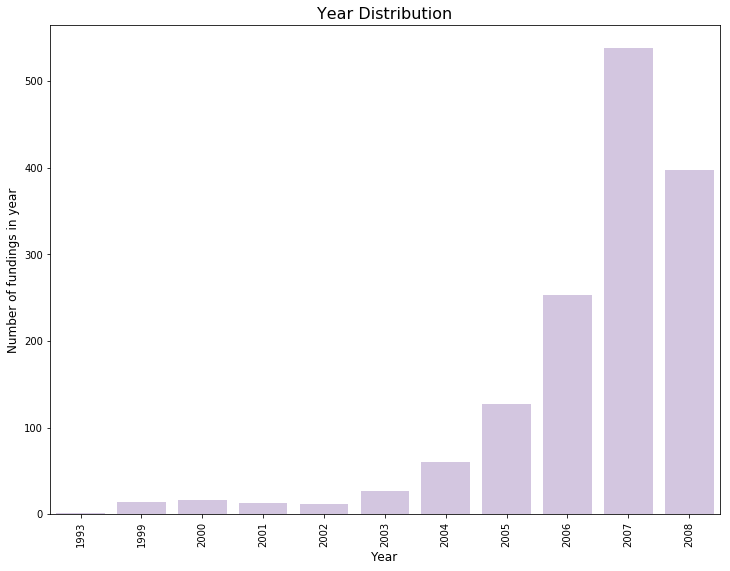

In [321]:
#lets see funding across years


year_month = funding_data['Year'].value_counts()
plt.figure(figsize=(12,9))
sns.barplot(year_month.index, year_month.values, alpha=0.4, color=color[4])
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of fundings in year', fontsize=12)
plt.title("Year Distribution", fontsize=16)
plt.show()

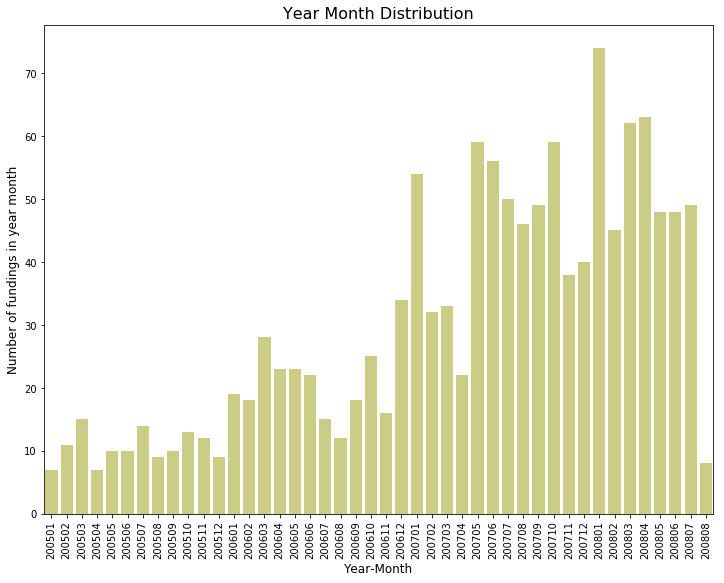

In [270]:

year_month=funding_data.loc[funding_data['Year-Month']>=200501]
year_month = year_month['Year-Month'].value_counts()
plt.figure(figsize=(12,9))
sns.barplot(year_month.index, year_month.values, alpha=0.6, color=color[8])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of fundings in year month', fontsize=12)
plt.title("Year Month Distribution", fontsize=16)
plt.show()

In [342]:
print("Maximum funding to a comapny is : ",funding_data["raisedAmt"].dropna().sort_values().max())
funding_data[funding_data.raisedAmt == 300000000.0]

Maximum funding to a comapny is :  94200000.00000073


,permalink,company,Employee count,category,fundedDate,raisedAmt,raisedCurrency,round,currency_conv,flag,Total_amount,Year,Month,Week,Day,city,state,Year-Month,log_sum


In [272]:
funding_data[funding_data.company.isin(['Facebook','ZeniMax'])]

,permalink,company,Employee count,category,fundedDate,raisedAmt,raisedCurrency,round,currency_conv,flag,Total_amount,Year,Month,Week,Day,city,state,Year-Month
11,facebook-7,Facebook,450.0,web,2004-09-01,500000.0,USD,angel,1.0,1.0,500000.0,2004,9,01,35,Palo Alto,CA,200409
12,facebook-8,Facebook,450.0,web,2005-05-01,12700000.0,USD,a,1.0,1.0,12700000.0,2005,5,01,18,Palo Alto,CA,200505
13,NaN,Facebook,450.0,web,2006-04-01,27500000.0,USD,b,1.0,1.0,27500000.0,2006,4,01,13,Palo Alto,CA,200604
14,facebook-3,Facebook,450.0,web,2007-10-01,300000000.0,USD,c,1.0,1.0,300000000.0,2007,10,01,39,Palo Alto,CA,200710
15,NaN,Facebook,450.0,web,2008-03-01,40000000.0,USD,c,1.0,1.0,40000000.0,2008,3,01,08,Palo Alto,CA,200803
16,facebook-3,Facebook,450.0,web,2008-01-15,15000000.0,USD,c,1.0,1.0,15000000.0,2008,1,15,02,Palo Alto,CA,200801
17,facebook-4,Facebook,450.0,web,2008-05-01,100000000.0,USD,debt_round,1.0,1.0,100000000.0,2008,5,01,17,Palo Alto,CA,200805
1104,zenimax-6,ZeniMax,NaN,web,2007-10-01,300000000.0,USD,a,1.0,1.0,300000000.0,2007,10,01,39,Rockville,MD,200710
1105,zenimax-7,ZeniMax,NaN,web,2008-05-30,9900000.0,USD,a,1.0,1.0,9900000.0,2008,5,30,21,Rockville,MD,200805


In [341]:
print("Minimum funding to a company is : ",funding_data["raisedAmt"].dropna().sort_values().min())
funding_data[funding_data.raisedAmt == 6000.0]
funding_data[funding_data.company.isin(['Loopt'])]

Minimum funding to a company is :  15000.0


,permalink,company,Employee count,category,fundedDate,raisedAmt,raisedCurrency,round,currency_conv,flag,Total_amount,Year,Month,Week,Day,city,state,Year-Month,log_sum
473,loopt-7,Loopt,NaN,web,2005-06-01,15000.0,USD,seed,1.0,1.0,6000.0,2005,6,01,22,Mountain View,CA,200506,9.615872
474,loopt-7,Loopt,NaN,web,2007-07-23,8250000.0,USD,b,1.0,1.0,8250000.0,2007,7,23,29,Mountain View,CA,200707,15.925724


In [274]:
print("On Average ventures got funding of : ",funding_data["raisedAmt"].dropna().sort_values().mean())

On Average ventures got funding of :  10137129.369431118


Total comapnies funded :  908
Facebook              7
SearchMe              5
JuiceWireless         5
ActionEngine          5
TeslaMotors           5
PlasticLogic          5
Brightcove            5
GlamMedia             5
Vivâ€™simo            5
AnswersCorporation    5
JingleNetworks        5
Greenplum             4
Cooking.com           4
Akimbo                4
Clearspring           4
Friendster            4
ChoiceStream          4
WaterfrontMedia       4
Trulia                4
SugarCRM              4
Name: company, dtype: int64


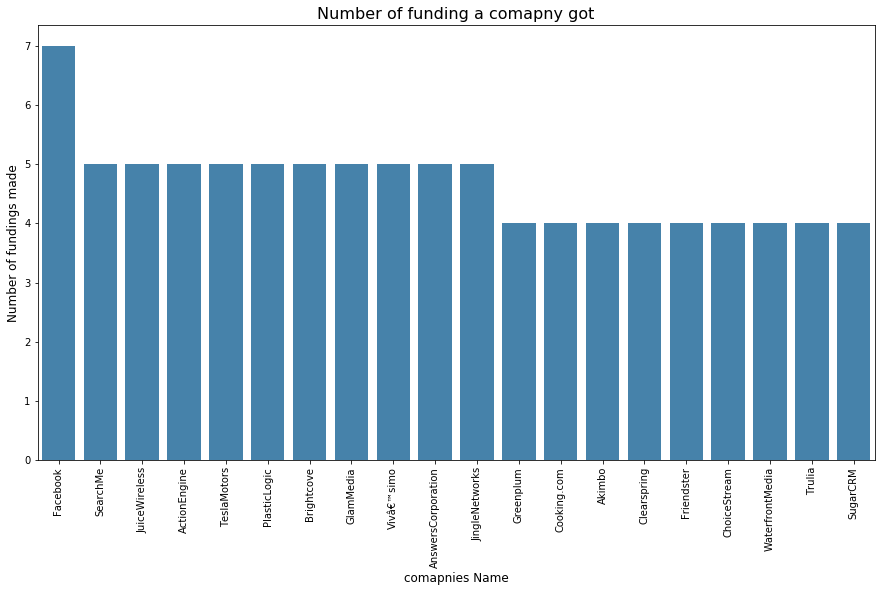

In [343]:
print("Total comapnies funded : ", len(funding_data["company"].unique()))
print(funding_data["company"].value_counts().head(20))
startupname = funding_data['company'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('comapnies Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a comapny got", fontsize=16)
plt.show()


web           1207
software       102
mobile          48
hardware        39
others          24
other           16
cleantech       14
consulting       5
biotech          4
Name: category, dtype: int64


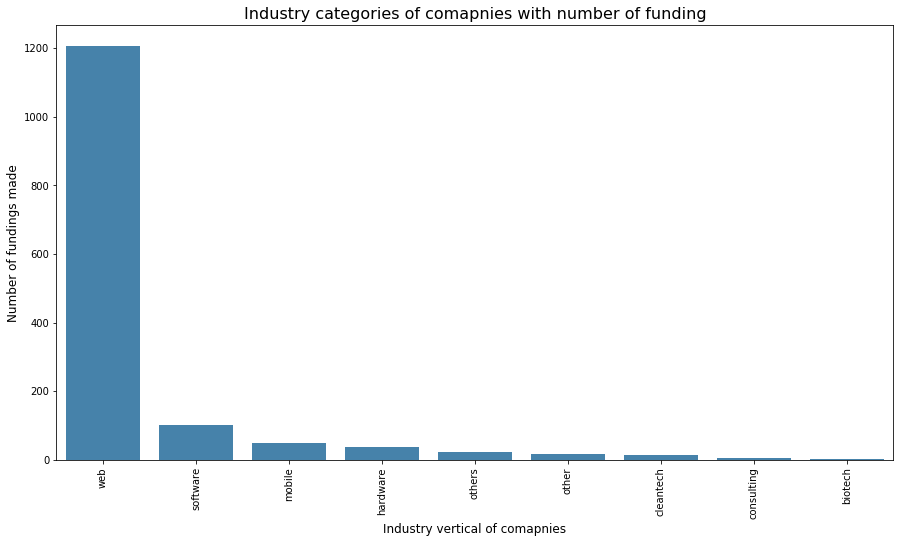

In [339]:
#categories that got funding
industry = funding_data['category'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of comapnies', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry categories of comapnies with number of funding", fontsize=16)
plt.show()

San Francisco    228
New York          93
Mountain View     89
Palo Alto         78
Seattle           75
San Mateo         70
Redwood City      42
Los Angeles       40
Cambridge         34
Sunnyvale         31
Name: city, dtype: int64


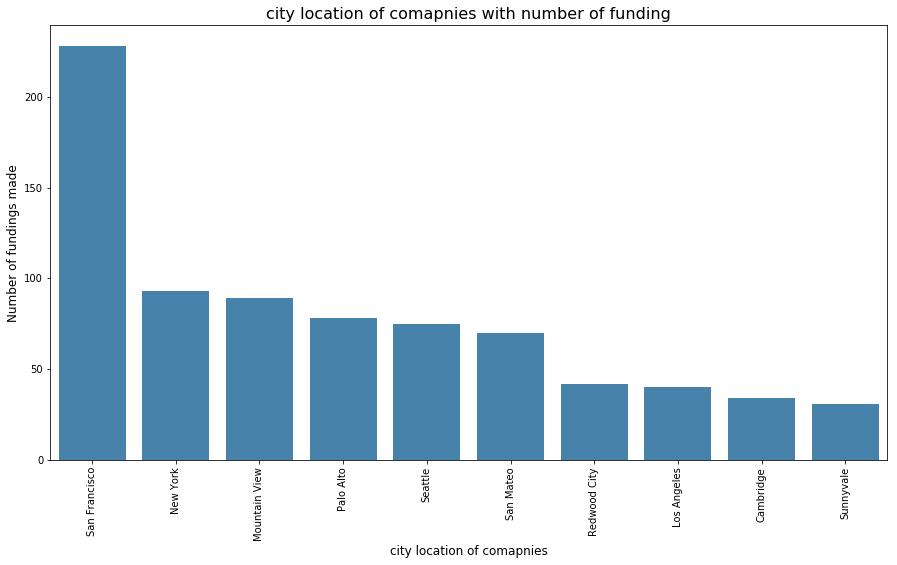

In [338]:
city = funding_data['city'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of comapnies', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of comapnies with number of funding", fontsize=16)
plt.show()

San Francisco    228
New York          93
Mountain View     89
Palo Alto         78
Seattle           75
San Mateo         70
Redwood City      42
Los Angeles       40
Cambridge         34
Sunnyvale         31
Name: city, dtype: int64


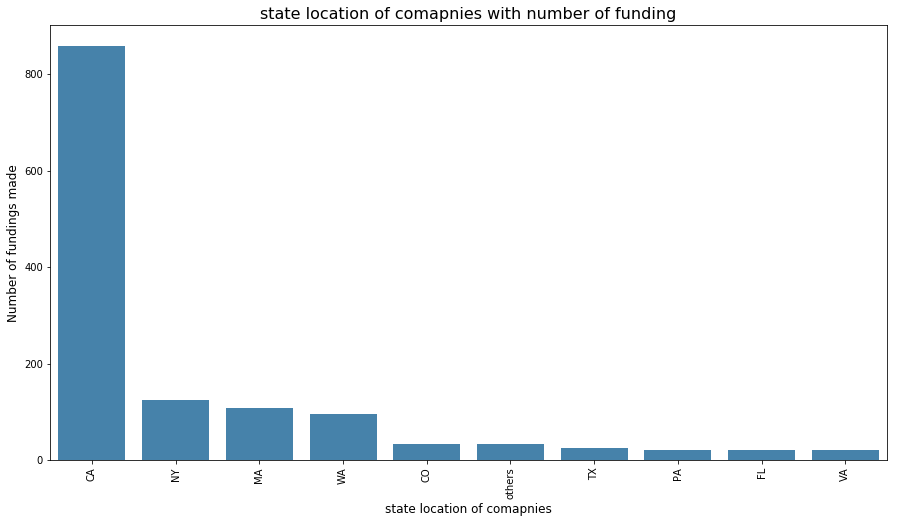

In [337]:
state = funding_data['state'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(state.index, state.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('state location of comapnies', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("state location of comapnies with number of funding", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Distribution of companies across Top cities')

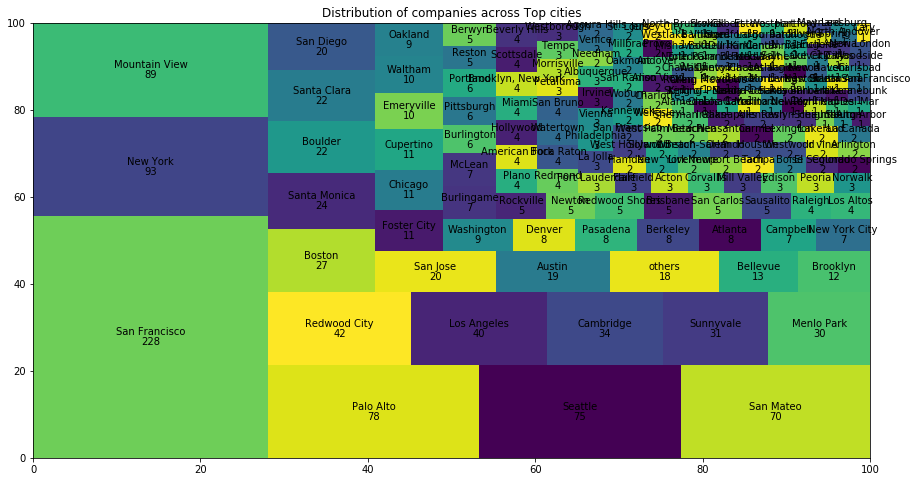

In [345]:

plt.figure(figsize=(15,8))
count = funding_data['city'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of companies across Top cities')

Description count of Location
San Francisco    228
New York          93
Mountain View     89
Palo Alto         78
Seattle           75
Name: city, dtype: int64


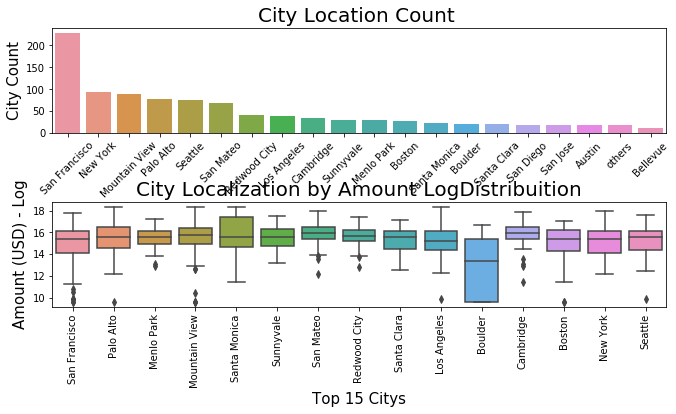

In [313]:
location = funding_data['city'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(11,5))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='city', y="log_sum",
                data=funding_data[funding_data.city.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

Text(0.5, 1.0, 'Distribution of companies across Top cities')

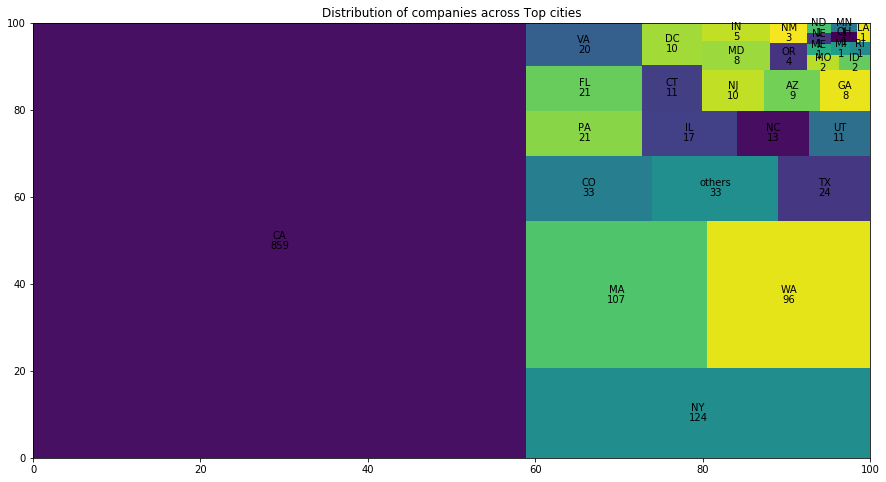

In [344]:

plt.figure(figsize=(15,8))
count = funding_data['state'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of companies across Top cities')

a               581
b               371
c               141
angel           135
seed            128
d                47
unattributed     28
debt_round       17
e                11
Name: round, dtype: int64


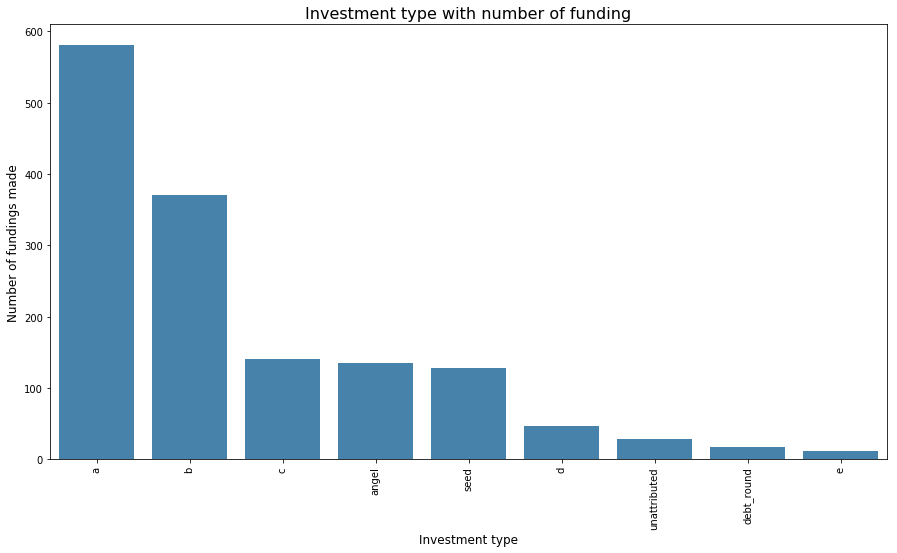

In [336]:
investors = funding_data['round'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment type with number of funding", fontsize=16)
plt.show()

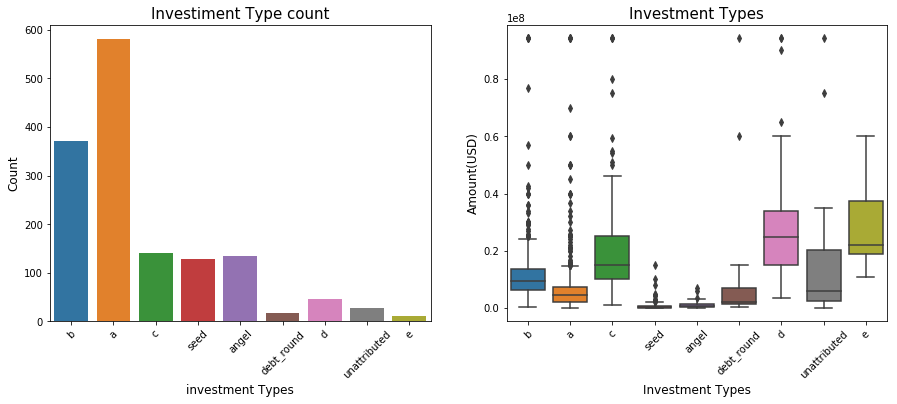

In [335]:


plt.figure(figsize = (15,12))
plt.subplot(221)

g = sns.countplot(x="round", data=funding_data)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investiment Type count", fontsize=15)
g.set_xlabel("investment Types", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(222)
g1 = sns.boxplot(x="round", y="raisedAmt", 
            data=funding_data)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Investment Types", fontsize=15)
g1.set_xlabel("Investment Types", fontsize=12)
g1.set_ylabel("Amount(USD)", fontsize=12)

plt.show()

In [334]:
temp = funding_data["round"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment  %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

D:\newconda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



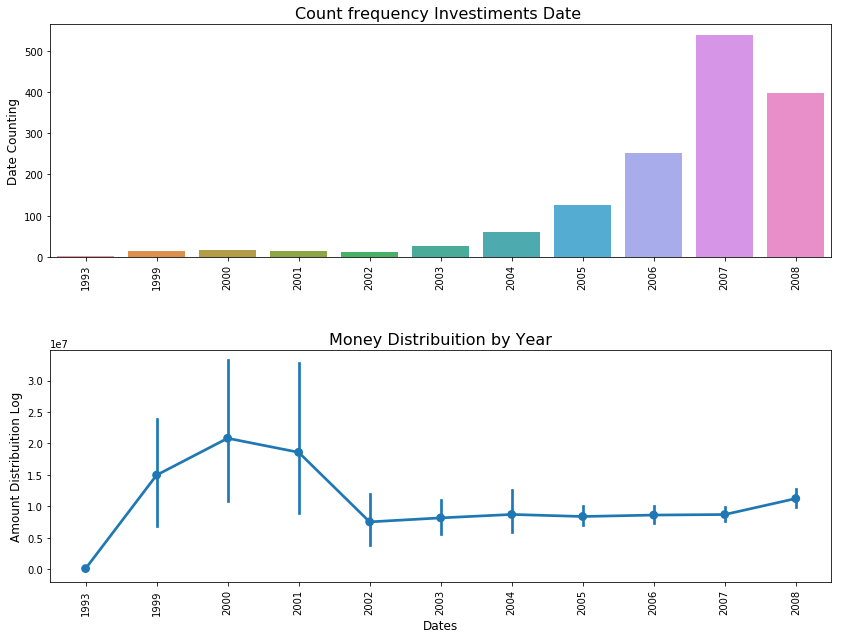

In [323]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x='Year', data=funding_data)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Investiments Date ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='Year', y='raisedAmt', data=funding_data)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Money Distribuition by Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()
